# Tutorial básico de Julia

## Julia IV


> Ricardo Méndez Fragoso $\mathbb{R}i \vec c \hbar$
>
> Agradecimiento especial a Diego Alberto Olvera Millán por iniciar este tutorial que se ha ido actualizando a lo largo del tiempo.


## Empezar a programar Julia

Con lo visto en los Notebooks anteriores tenemos suficientes herramientas para comenzar a programar y resolver problemas usando Julia. 

En $\mathbb{C}1\varepsilon \eta \mathbb{c} 1 \alpha$ modelamos muchos sistemas con ecuaciones diferenciales. Por ejemplo, la dinámica de un proyectil puntual de masa $m$ que es lanzado y tiene un coeficiente de rozamiento con el aire $\gamma$ se describe con la ecuación diferencial: 

$$ m \ddot{\mathbf{r}} = m\mathbf{g} - \gamma \dot{\mathbf{r}}, $$

donde las negritas denotan la naturaleza vectorial de las cantidades. Esta ecuación diferencial puede ser descompuesta en componentes y resuelta sin demasiadas dificultades usando el método de factor integrante o algún otro método conveniente, pero hay algunas ecuaciones que son muy difíciles de resolver o que no tienen una solución en términos de funciones elementales.

En ocasiones se deben utilizar métodos con series de potencias y/o funciones especiales para resolverse. Un ejemplo de esto es la ecuación de Legendre: 

$$ (1-x^2)y''(x) -2xy'(x) + \ell ( \ell+1)y(x) = 0,  $$

con $\ell$ entero, la solución a esta ecuación son los [polinomios de Legendre](https://en.wikipedia.org/wiki/Legendre_polynomials). En general, nos preguntamos si: ¿Existe una manera de acercarnos a las soluciones de estas ecuaciones sin necesidad de resolverlas explícitamente?. Una parte de la respuesta es si consideremos una ecuación diferencial y una condición inicial de la forma:

$$ y'=f(y,x) \;\;\; ... (1) $$

$$ y(x_0) = y_0 \;\;\; ... (2) $$

donde $y$ es una función de $x$. Recordemos que la definición de derivada es: 

$$ y'(x) = \lim_{h \to 0} \frac{y(x+h) - y(x)}{h}. $$

Una aproximación a primer orden sería:

$$ y'(x) \approx \frac{y(x+h) - y(x)}{h}.  $$

De esta manera, si $h$ es suficientemente pequeña se obtiene:

$$ y(x+h) \approx y(x) + h·y'(x) \;\;\; ...(3).  $$

Sustituyendo (1) en (3) llegamos a: 

$$ y(x+h) \approx y(x) + h·f(y(x),x) \;\;\; ...(4). $$

La Ec. (4) nos da una aproximación a la solución de la ecuación diferencial y nos proporciona el llamado método de Euler para encontrar la solución a una ecuación diferencial. En  general, mientras más chico sea el tamaño del paso, es decir, el tamaño de $h$, mejor será nuestra aproximación. En la computadora no podemos generar por este método, ni ninguno otro, un conjunto continuo de valores, así que hacemos  la sucesión $x_0,x_1 = x_0+h,...,x_{n} = x_0 + nh,...,x_f=x_0+mh$, donde $m$ es el número de pasos que queremos dar. Con ello hacemos la siguiente identificación: 

$$ y_0 \approx y(x_0) $$
$$ y_1 \approx y(x_0) + h · f(y_0,x_0)$$
$$ \vdots $$
$$ y_{n+1} \approx y(x_n) + h · f(y_n,x_n) \;\;\;\;\; ... (5)$$
$$ \vdots $$
$$ y_m \approx y_{m-1} + h · f(y_{m-1},x_{m-1}) $$

Las $y_i's$, con $i \in \{0,1,...,m\}$ constituyen un arreglo al que llamamos la aproximación numérica a la solución de la Ec. (1) con condición inicial dada por la Ec. (2). Ahora implementemos esto en una función. 

Lo primero que hay que tener en cuenta son los argumentos que debe llevar la función. En este caso es conveniente tomar como argumentos la condición inicial $y_0$, el paso inicial $x_0$, el paso final $x_f$, el tamaño de paso $h$ y la función que define a la ecuación diferencial, de modo que escribiríamos algo así:

```julia
function euler(y0,x0,xf,h,f)
```

Alternativamente podríamos usar el paso inicial, el tamaño de paso y el número de pasos que queremos dar, quedando algo como: 

```julia
function euler(y0,x0,h,m,f)
```

Usaremos la primera opción porque así es más fácil tener control de dónde queremos que termine la función $y$. Además, por lo general, sabremos el intervalo en el que nos interesa conocer el valor de la solución. 

También será conveniente que la función nos devuelva un par de arreglos, uno que tiene como elementos a $ \{x_0,x_1,...,x_m \} $ y otro con las correspondientes $\{y_0,...,y_m \}.$ El primer arreglo lo podemos hacer de inmediato. Usando los argumentos de la primera opción quedaría como: 

```julia
x = x0:h:xf
```

> Se deja como ejercicio al lector definir el arreglo `x` para la segunda opción de argumentos. 

Luego debemos inicializar un arreglo `y` donde guardaremos los valores que vayamos obteniendo de la aproximación. Evidentemente `y` tiene el mismo tamaño que `x` y su primer elemento es precisamente $y_0$. Después debemos generar los siguientes elementos de `y` mediante la ecuación iterativa en la Ec. (5). Una función que implementa este algoritmo se muestra en la siguiente celda: 

In [1]:
function euler(y0,x0,xf,h,f)
    x=x0:h:xf      # Arreglo de los valores de x en el intervalo de interes.
    y=zeros(length(x)) # Arreglo donde se guardan los valores de la aproximacion.
    y[1] = y0          # El primer elemento es y0. 
    for i in 2:length(x)  # Recordemos que los for son utiles para hacer calculos iterativos. 
        y0 = y0 + h * f(y0,x[i]) # La ecuacion (5). El valor de y0 se actualiza en cada paso del for, de modo que
        y[i] = y0                # en el primer paso y0 corresponde a y1 de (5), en el segundo corresponde a y2, etc. 
        end                      
    y,x    # La función nos devuelve la aproximacion y el intervalo de interes. 
end

euler (generic function with 1 method)

Ahora veamos qué tan bien trabaja nuestra función. Consideremos en primera instancia la ecuación diferencial: 

$$ y'(x) = -y(x), $$
$$ y(0) = 1. $$

Esta ecuación nos es conocida y sabemos que la solución es $y(x) = e^{-x}$ así que podremos comparar fácilmente la aproximación numérica a la solución real.

Para esta ecuación la forma de la $f$ que aparece en la Ec. (1) es: 

$$ f(y,x) = -y. $$

Tomemos en cuenta que, aunque x no aparece explícitamente en $f$, debemos definir nuestra función tomando argumentos `y` y `x` porque de otro modo la función `euler` no correría. Se recomienda como ejercicio comprobar que esto es cierto y explicar la razón de ello.

In [2]:
expo(y,x) = -y

expo (generic function with 1 method)

Con esto estamos listos para hacer uso de la función. Probemos con dos tamaños de paso distintos para ver qué tal funciona. 

In [3]:
#El punto y coma al final le indica a la celda que no muestre el output. 
aproximacion1,intervalo1 = euler(1,0,10,.5,expo)    #h=.5
aproximacion2,intervalo2 = euler(1,0,10,.1,expo)    #h=.1;

Para hacer la comparación graficaremos la solución aproximada contra la solución real. 

In [4]:
using PyPlot

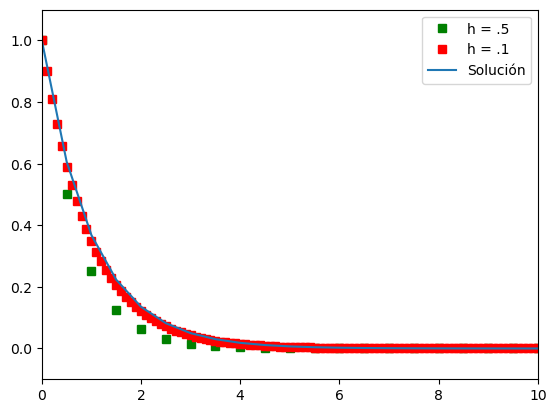

In [5]:
plot(intervalo1,aproximacion1,"gs",label="h = .5")
plot(intervalo2,aproximacion2,"rs",label="h = .1")
plot(intervalo1,[ℯ^(-x) for x in intervalo1],label="Solución")
axis([0,10,-.1,1.1])
legend()
show()

Podemos observar que con un tamaño de paso más chico obtenemos una mejor aproximación a la solución real. Este es el caso para muchas ecuaciones pero hay [varias ecuaciones](https://en.wikipedia.org/wiki/Stiff_equation) para las cuales no ocurre esto. Por el momento asumiremos que nuestro método funciona bien, siempre y cuando usemos un tamaño de paso lo suficientemente pequeño. Pondremos un ejemplo extra que pone de manifiesto esto. Consideremos la ecuación diferencial:

$$ y' = y + 5e^{\frac{x}{2}} \cos(5x) - \frac{1}{2} e^{\frac{x}{2}} \sin(5x), $$
$$ y(0) = 0. $$

Su solución real es: 

$$ y(x) = e^{\frac{x}{2}} \sin(5x). $$

Veamos cómo nos va con el método de Euler. 

In [6]:
H=[0.1,0.05,0.01]
intervalos = Array{Any}(undef,3)
aproxs = Array{Any}(undef,3)
F(y,x) = y + 5*ℯ^(x/2) * cos(5*x) - .5 * ℯ^(x/2) * sin(5*x)
for i in 1:3
    aproxs[i],intervalos[i] = euler(0,0,7,H[i],F)
end

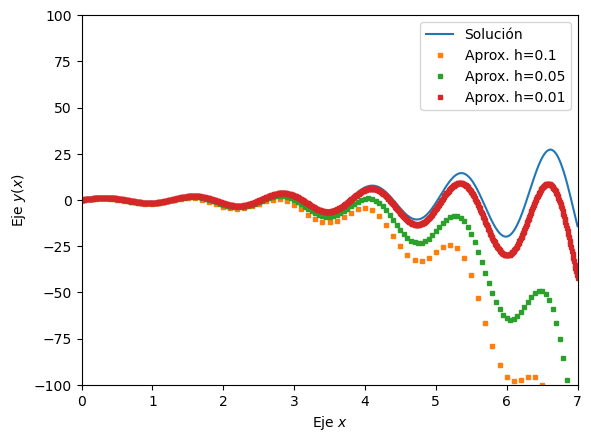

In [10]:
plot(collect(0:0.01:7),[ℯ^(x/2) * sin(5x) for x in 0:0.01:7],label="Solución")
for i in 1:3
    plot(intervalos[i],aproxs[i],"s", markersize = 3,label="Aprox. h=$(H[i])")
end
axis([0,7,-100,100])
xlabel("Eje \$x\$"); ylabel("Eje \$y(x)\$");legend()
show()

En este ejemplo podemos apreciar claramente como nuestra aproximación se va haciendo cada vez peor para valores de $h$ grandes. Podemos reducir el error tomando $h$'s más pequeñas, pero debemos tomar en cuenta que el error seguirá creciendo y cuando nos interese el valor de la aproximación para una $x$ muy grande no podremos asegurar que nuestra aproximación sea buena. Se recomienda al lector revisar que si se escoge un intervalo para $x$, por ejemplo $x \in [80,95]$ y una $h=.0001$ se puede apreciar muy claramente el error. También es de notar lo rápido que se ejecuta la función `euler`.    

Consideremos ahora el caso de un sistema de $\ell$ ecuaciones diferenciales y $\ell$ condiciones iniciales: 

$$ y_1 ' (x) = f_1\big(y_1(x),y_2(x),...,y_\ell(x),x\big), $$
$$ y_2 ' (x) = f_2\big(y_1(x),y_2(x),...,y_\ell(x),x\big), $$
$$ \vdots $$
$$ y_\ell ' (x) = f_\ell\big(y_1(x),y_2(x),...,y_\ell(x),x\big) \;\;\; ...(6) $$

$$ y_1(x_0) = y_{1_0} $$
$$ \vdots $$
$$ y_\ell(x_0) = y_{\ell_0} \;\;\; ... (7) $$

Podemos escribir este problema de forma vectorial como: 

$$ \mathbf{y}'(x) = \mathbf{f}(\mathbf{y}(x),x) \;\;\; ...(8) $$

Como conocemos el "vector de condiciones iniciales" $\mathbf{y}(x_0)$ podemos aplicar el método de Euler a cada una de las componentes de la Ec. (8), es decir a las ecuaciones en (6), de modo que podemos generalizar el método fácilmente. Pero, ¿Cómo lo implementamos en la computadora?, ¿Qué tipo de objetos tendremos que usar ahora? Pensemos un segundo: en la primera función `euler` que se definió obteníamos dos colecciones de números distintas, un rango y un arreglo indexable. Mientras no trabajemos con ecuaciones diferenciales parciales no tendremos que preocuparnos por el rango ya que $x$ es la misma para todas las ecuaciones, entonces nos podemos concentrar en el arreglo. Este arreglo, recordemos, tiene como elementos la aproximación a la solución de la ecuación diferencial en (1), `y[i+1]` $=y_{i} \approx y(x_i)$, con $i\in\{0,1,...,m\}$, pero ahora tenemos $\ell$ de estas soluciones y queremos $\ell$ aproximaciones cada arreglo de $m$ elementos. ¿Cómo podemos guardar esto? Una opción es usar una *matriz*, un arreglo indexable con 2 índices de $m \times \ell$. En esta matriz la columna $i$-ésima sería un arreglo de $m$ elementos que representa la aproximación a la solución de la Ec. (6), $y_i (x).$ Hay muchas otras maneras en las que se podría hacer y se recomienda al lector pensar en algunas e implementarlas. De momento usemos la idea de la matriz para escribir una función de `euler` que resuelva un sistema de ecuaciones.   

In [11]:
function euler_2(y0,x0,xf,h,f)
    x=x0:h:xf    #Este rango cambia 
    m=length(x)         
    l=length(y0) #Numero de funciones en el sistema. 
    y=zeros(m,l) 
    y[1,:]=hcat(y0...) #Las condiciones iniciales son todo el primer renglon del arreglo. 
    for i in 2:m
        y0=y0 + h*f(y0,x[i])
        y[i,:]=hcat(y0...)
    end
    y,x
end

euler_2 (generic function with 1 method)

Ahora probemos como funciona. Consideremos el sistema de ecuaciones:

$$ y_1'=3y_1-4y_2, $$
$$ y_2'=4y_1-7y_2. $$

$$ y_1(0)=y_2(0)=1. $$

Las soluciones son: 

$$ y_1(x)=\frac{2}{3}e^t + \frac{1}{3}e^{-5t}, $$
$$ y_2(x)=\frac{1}{3}e^t + \frac{2}{3}e^{-5t}. $$

Ahora resolvemos numéricamente usando nuestra función. Una cosa que es muy importante tomar en cuenta es la manera en que ha de definirse la función que toma `euler_2` como argumento. Tomando en cuenta la forma de la ecuación en (8), parece conveniente hacer que la función sea *vectorial*, esto en Julia quiere decir que la función debe regresar un arreglo. El primer elemento del arreglo será:

$$f_1 (\mathbf{y}(x),x)$$

y así sucesivamente. Por otro lado, notamos también que tenemos un *vector* de funciones para las cuales buscamos solución. De esta manera, el argumento que toma la función también debe ser un arreglo cuyo elemento i-ésimo se corresponde con $y_i(x)$. Veamos:

In [12]:
f_sistema(y,x) = [3*y[1] - 4*y[2],4*y[1] - 7*y[2]]  # y es un arreglo, x es un flotante.
# La funcion devuelve un arreglo.

f_sistema (generic function with 1 method)

In [13]:
# Las condiciones iniciales las introducimos en un arreglo
aprox_sistema,intervalo_sistema = euler_2([1,1],0,5,0.01,f_sistema)
aprox_sistema

501×2 Array{Float64,2}:
  1.0        1.0
  0.99       0.97
  0.9809     0.9417
  0.972659   0.915017
  0.965238   0.889872
  0.9586     0.866191
  0.952711   0.843901
  0.947536   0.822937
  0.943045   0.803233
  0.939207   0.784728
  0.935994   0.767365
  0.933379   0.75109
  0.931337   0.735848
  ⋮         
 86.5088    43.2544
 87.3739    43.687
 88.2477    44.1238
 89.1302    44.5651
 90.0215    45.0107
 90.9217    45.4608
 91.8309    45.9154
 92.7492    46.3746
 93.6767    46.8383
 94.6135    47.3067
 95.5596    47.7798
 96.5152    48.2576

En este caso nos interesa inspeccionar lo que nos devuelve la función. Es una matriz $\mathbf{y}$, y como mencionamos, las columnas corresponden a las aproximaciones. Grafiquemos entonces el arreglo de $x$ contra la primera columna y eso nos dará la aproximación numérica a $y_1(x)$.

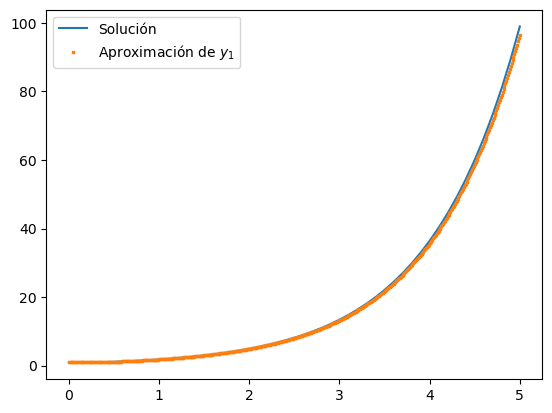

In [15]:
plot(collect(0:.1:5),[2/3 * ℯ^x + 1/3 * ℯ^(-5*x) for x in 0:.1:5],label="Solución")
plot(intervalo_sistema,aprox_sistema[:,1],"s",markersize = 2,label="Aproximación de \$ y_1 \$")
legend()
show()

Vemos que la aproximación es buena en el intervalo $[0,5]$. El método de Euler en la forma que lo hemos estado aplicando sólo sirve para resolver ecuaciones de primer orden. ¿Qué hacemos en caso de tener derivadas de orden superior? Consideremos, por ejemplo la siguiente ecuación diferencial:

$$ y''(x) = f(y',y,x) ...(9) $$

El método de Euler no nos permite resolver inmediatamente la ecuación (9), pero podemos pensar esta ecuación como un sistema de ecuaciones: 

$$ y'(x) = z(x) $$

$$ z'(x) = f(y,z,x) ...(11) $$

y tenemos un sistema de dos ecuaciones de primer orden como teníamos en (6) e identificamos $y_1$ con $y$ y $y_2$ con $z$. Por otro lado $f_1(y_1,y_2,x) = z(x)$ y $f_2(y_1,y_2,x) = f(y,z,x)$. Haciendo esto podemos aplicar nuestro método de Euler para resolver una ecuación diferencial de segundo orden y así vemos a la expresión en (11) como si fueran las Ecs. en (6). Veamos cómo se hace para la ecuación diferencial: 

$$ y''(x) = -y(x), $$

$$ y(0)=1 \ ; \ y'(0) = 0. $$

Esta ecuación tiene como solución $y(x) = cos(x)$ ($y'(x)=-sen(x)$). Para hacer la aproximación debemos definir funciones "auxiliares": $y_1=y$ , $y_2=y'$. Con ello tenemos el sistema: 

$$ y_1'(x) = y_2(x), $$

$$ y_2'(x) = -y_1(x), $$

$$ y_1(0) = 1 \ ; \ y_2(0) = 0. $$

A continuación procederemos a resolver el sistema de ecuaciones:

In [17]:
# Programacion del sistema de ecuaciones
seg_orden(y,x) = [y[2] ,-y[1]]

seg_orden (generic function with 1 method)

In [19]:
aprox_seg_orden,int_seg_orden = euler_2([1,0],0,2π,0.05,seg_orden);

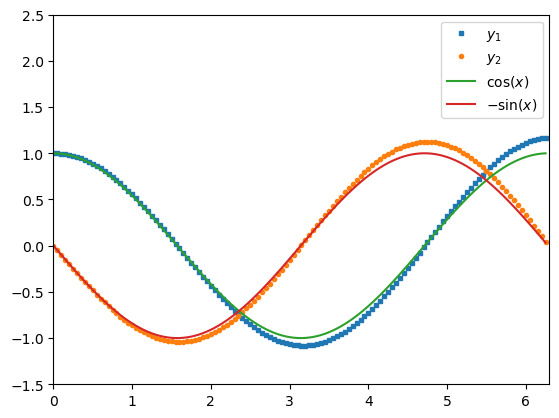

In [20]:
plot(int_seg_orden,aprox_seg_orden[:,1],"s",markersize = 3,label=L"y_1")
plot(int_seg_orden,aprox_seg_orden[:,2],"o",markersize = 3,label=L"y_2")
plot(int_seg_orden,[cos(x) for x in int_seg_orden],label=L"\cos (x)")
plot(int_seg_orden,[-sin(x) for x in int_seg_orden],label=L"-\sin (x)")
axis([0,6.3,-1.5,2.5])
legend()
show()

Como se puede observar, obtenemos la solución y la primera derivada con el método. Se uso una $h$ relativamente pequeña para que se distinga bien la aproximación de la solución. 

El método de Euler es una buena aproximación, pero acumula demasiado error. Un mejor método es el de [Runge-Kutta](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods). Para ejemplificar este método numérico, es conveniente usar dos funciones, una que haga un sólo paso del método y la segunda que implemente todo el método.

> Nota que la segunda función es idéntica a la que ya se definió para le método de Euler salvo por la actualización del valor de `y0`. La programación de este algoritmo está en la siguiente celda. 

In [21]:
function paso_RK4(f,x0,t0,h)
    k1=f(x0,t0)
    k2=f(x0+.5*k1*h,t0+.5*h)
    k3=f(x0+.5*k2*h,t0+.5*h)
    k4=f(x0+ k3*h,t0+ h)
    x=x0+(h/6)*(k1+2*k2+2*k3+k4)
    x
end

function integrar_RK4(x0,t0,tf,h,f)
    t=t0:h:tf; m=length(t); l=length(x0)
    x=zeros(m,l)
    x[1,:]=hcat(x0...)
    cont=2
    for i in 2:m
        x0=paso_RK4(f,x0,t0,h)
        x[i,:]=hcat(x0...)
    end
    x,t
end

integrar_RK4 (generic function with 1 method)

La implementación de este método numérico se realiza en las siguientes celdas

In [22]:
aprox_ec_dif,intervalo = integrar_RK4([1,0],0,2π,0.05,seg_orden);

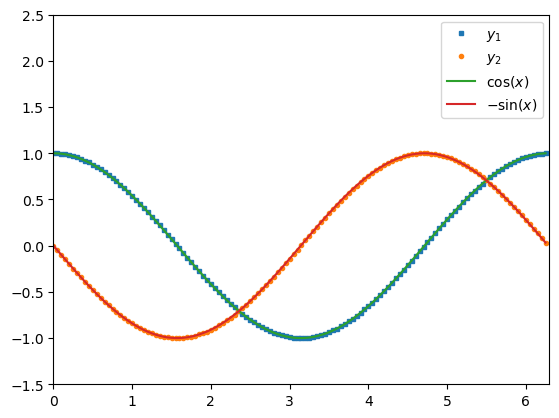

In [23]:
plot(intervalo,aprox_ec_dif[:,1],"s",markersize = 3,label=L"y_1")
plot(intervalo,aprox_ec_dif[:,2],"o",markersize = 3,label=L"y_2")
plot(intervalo,[cos(x) for x in intervalo],label=L"\cos (x)")
plot(intervalo,[-sin(x) for x in intervalo],label=L"-\sin (x)")
axis([0,6.3,-1.5,2.5])
legend()
show()

Como se puede observar, con este método la aproximación a la solución es mucho mejor y con ello se puede reducir el paso de integración.

**Julia** es un lenguaje de programación que tiene mucha versatilidad y que está en crecimiento constante debido a que cada vez más científicos se suman a esta propuesta. Es importante señalar que en lo subsecuente se estarán desarrollando en la medida de lo posible, *Notebook's* escritos en este lenguaje debido a que es mucho más rápido y eficiente, además de que se están incorporando nuevas bibliotecas que mejoran su desempeño.

Regresar a las [Herramientas](http://sistemas.fciencias.unam.mx/~rich/Herramientas/)

Curso relacionado con este notebook: [Física Computacional](http://sistemas.fciencias.unam.mx/~rich/FisComp/)

Se agradece el apoyo de los proyectos:
* PE 112919 durante el año 2020. *Actualización a la última versión de Julia. Se han agregado explicaciones y ejemplos*
* PE 105017 durante el año 2017. *Idea original*